# Lab | Data cleaning and wrangling

#### For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('W4 - D1 - we_fn_use_c_marketing_customer_value_analysis.csv') 

#### Look at the main features (`head`, `shape`, `info`).

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Rename the columns so they follow the _PE8_ (snake case).

In [6]:
data.columns = map(str.lower,data.columns)
data.columns = data.columns.str.replace(' ','_')

In [7]:
data = data.rename(columns = {'employmentstatus': 'employment_status'})

In [8]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### Change effective to date column to datetime format.

In [9]:
data['effective_to_date']= pd.to_datetime(data['effective_to_date'])

In [10]:
# Checking that 'effective_to_date' has been correctly transformed.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

#### Check `NaN` values per column.

In [11]:
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)
# There don't seem to be any null values.

,column_name,Percentage Null Values
0,customer,0.0
1,state,0.0
22,vehicle_class,0.0
21,total_claim_amount,0.0
20,sales_channel,0.0
19,renew_offer_type,0.0
18,policy,0.0
17,policy_type,0.0
16,number_of_policies,0.0
15,number_of_open_complaints,0.0


#### Define a function that differentiates between continuous and discrete variables. **Hint**: A number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.

#### Discrete variable
Discrete variables are numeric variables that have a countable number of values between any two values. A discrete variable is always numeric. For example, the number of customer complaints or the number of flaws or defects.
#### Continuous variable
Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. For example, the length of a part or the date and time a payment is received.

In [13]:
data.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employment_status                   5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [14]:
# Taking the condition that discrete variables will be those numerical columns that have <= 100 nunique() values. 
numerical_df = data.select_dtypes(include=['int64', 'float64', 'datetime64'])
category_df = data.select_dtypes(include=[np.object])
continuous_df = data[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']]
discrete_df = data[['effective_to_date', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]

In [15]:
category_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [16]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


In [17]:
discrete_df.head()

,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2011-02-24,32,5,0,1
1,2011-01-31,13,42,0,8
2,2011-02-19,18,38,0,2
3,2011-01-20,18,65,0,7
4,2011-02-03,12,44,0,1


#### Correlation matrix

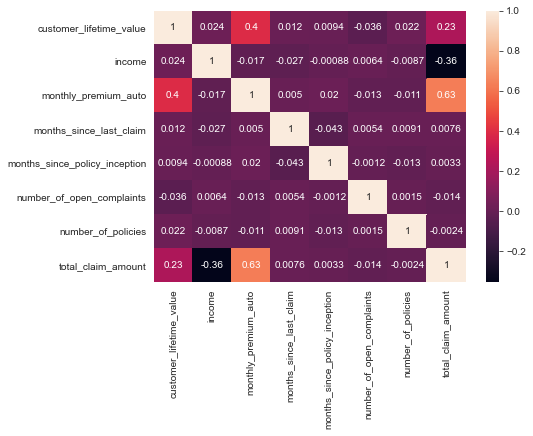

In [18]:
corr_matrix=numerical_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

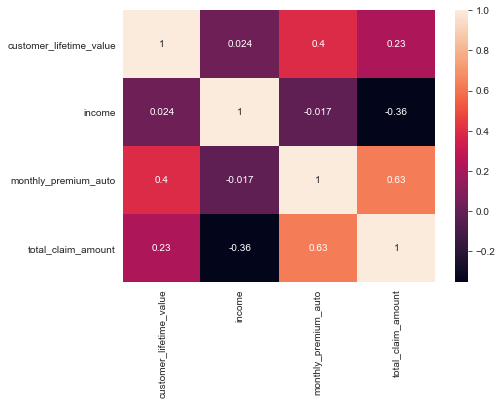

In [19]:
corr_matrix=continuous_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

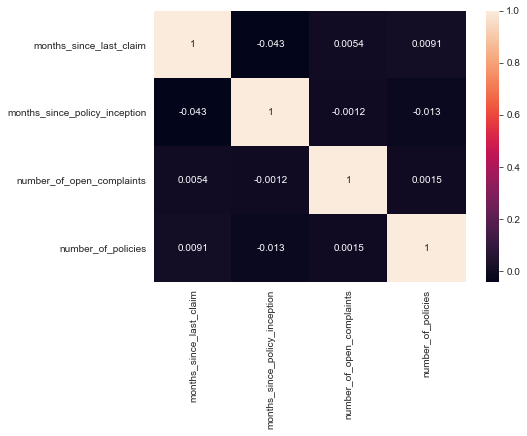

In [20]:
corr_matrix=discrete_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

##### Discrete variables don't have any correlation between them, whereas continuous variables have some correlation between them.

#### Plot discrete variables and continuous variables.

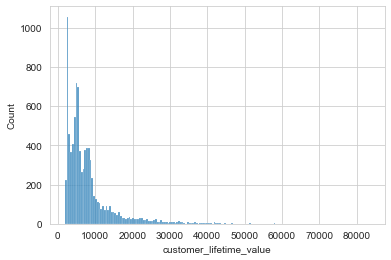

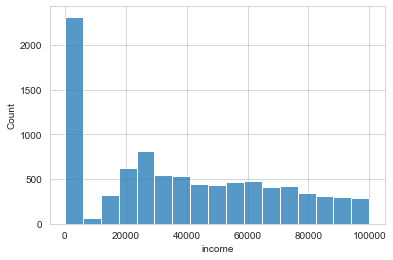

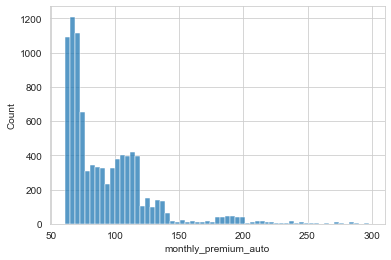

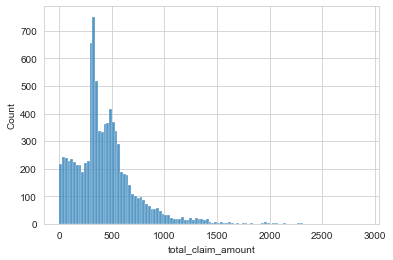

In [21]:
# Histplot for continuous variables.
for i in continuous_df.columns:
    sns.histplot(continuous_df[i])
    plt.show()

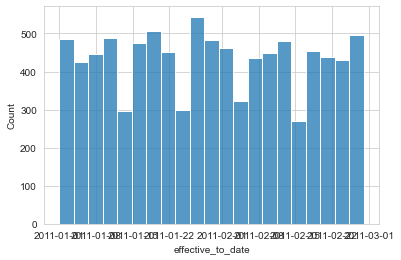

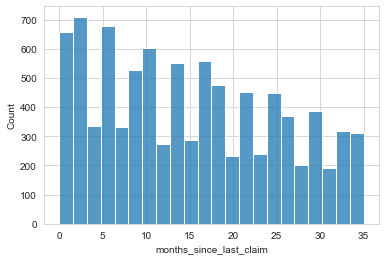

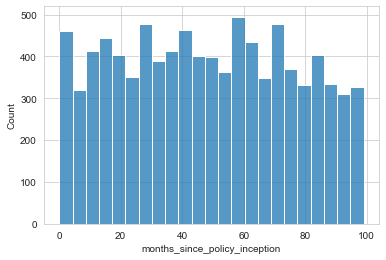

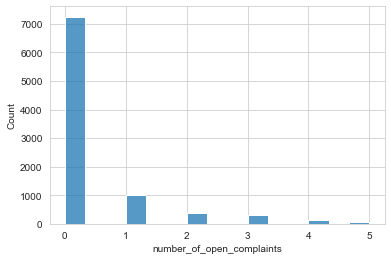

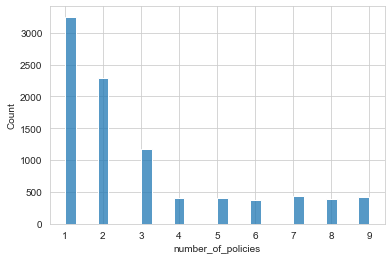

In [22]:
for i in discrete_df.columns:
    sns.histplot(discrete_df[i])
    plt.show()

#### Check for outliers in the continuous variables.

In [24]:
# I first check how many outliers there really are compared to the total amount of values.

In [25]:
continuous_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,434.088794
std,6870.967608,30379.904734,34.407967,290.500092
min,1898.007675,0.000000,61.000000,0.099007
25%,3994.251794,0.000000,68.000000,272.258244
50%,5780.182197,33889.500000,83.000000,383.945434
75%,8962.167041,62320.000000,109.000000,547.514839
max,83325.381190,99981.000000,298.000000,2893.239678


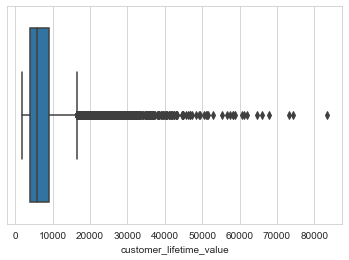

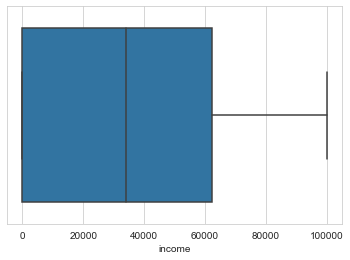

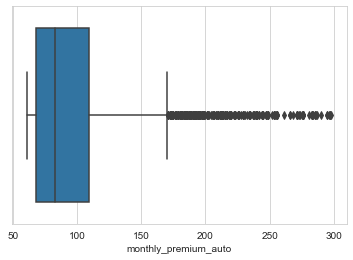

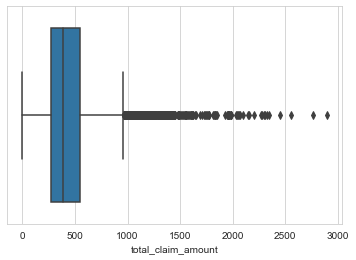

In [23]:
# Boxplot to find outliers.
for i in continuous_df.columns:
    sns.boxplot(continuous_df[i])
    plt.show()

In [26]:
len(continuous_df)

9134

In [27]:
Q1 = continuous_df.quantile(0.25)
Q3 = continuous_df.quantile(0.75)
IQR = Q3 - Q1

In [28]:
((continuous_df < (Q1 - 1.5 * IQR)) | (continuous_df > (Q3 + 1.5 * IQR))).sum()

customer_lifetime_value    817
income                       0
monthly_premium_auto       430
total_claim_amount         453
dtype: int64

In [29]:
iqr = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 16414.04
The number of points outise the upper wisker is:  817


In [30]:
iqr = np.percentile(continuous_df['monthly_premium_auto'],75) - np.percentile(continuous_df['monthly_premium_auto'],25)
upper_limit = np.percentile(continuous_df['monthly_premium_auto'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = continuous_df[continuous_df['monthly_premium_auto'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 170.50
The number of points outise the upper wisker is:  430


In [31]:
iqr = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['total_claim_amount'],25)
upper_limit = np.percentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = continuous_df[continuous_df['total_claim_amount'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

The upper wisker is at: 960.40
The number of points outise the upper wisker is:  453


In [32]:
# The column with the most outliers has less than 10% of outliers. 
# The outliers are relatively continuous, there aren't unique outliers, so I will avoit dropping them.

### LAB - 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [33]:
# With the amount of outliers, I prefer to apply a Box-Cox transformation before dropping.

In [34]:
continuous_df.shape

(9134, 4)

In [35]:
# Box-Cox transformation
from scipy import stats
continuous_df['customer_lifetime_value_bxcx'], lmbda = stats.boxcox(continuous_df['customer_lifetime_value'])
# customer_lifetime_value_bxcx is a new column of transformed data

In [36]:
continuous_df['monthly_premium_auto_bxcx'], lmbda = stats.boxcox(continuous_df['monthly_premium_auto'])

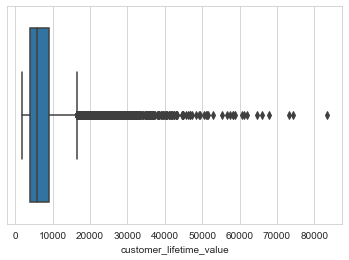

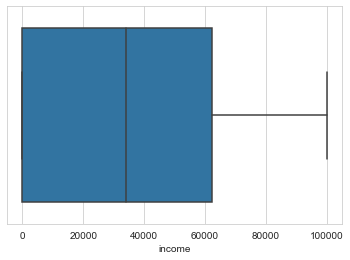

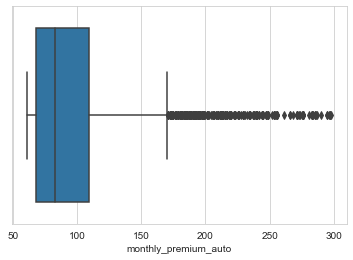

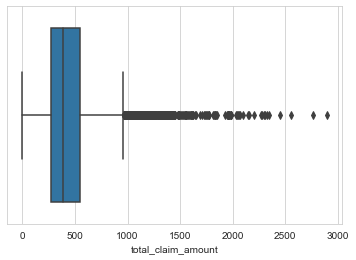

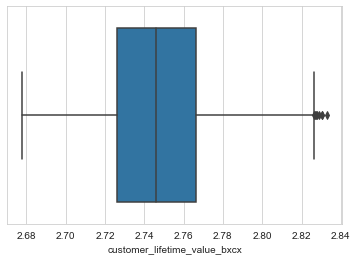

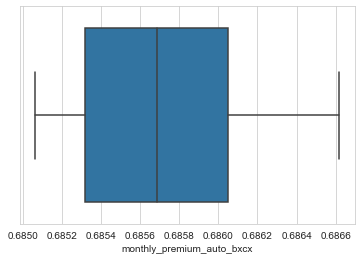

In [37]:
for i in continuous_df.columns:
    sns.boxplot(continuous_df[i])
    plt.show()

In [38]:
continuous_df_bxcx = continuous_df.drop(columns = ['customer_lifetime_value', 'monthly_premium_auto'],axis=1)

In [39]:
continuous_df_bxcx.head()

,income,total_claim_amount,customer_lifetime_value_bxcx,monthly_premium_auto_bxcx
0,56274,384.811147,2.703839,0.685347
1,0,1131.464935,2.754926,0.685871
2,48767,566.472247,2.780772,0.686039
3,0,529.881344,2.759125,0.686018
4,43836,138.130879,2.704995,0.685461


In [40]:
print("Amount of outliers")
Q1 = continuous_df_bxcx.quantile(0.25)
Q3 = continuous_df_bxcx.quantile(0.75)
IQR = Q3 - Q1
((continuous_df_bxcx < (Q1 - 1.5 * IQR)) | (continuous_df_bxcx > (Q3 + 1.5 * IQR))).sum()

Amount of outliers


income                            0
total_claim_amount              453
customer_lifetime_value_bxcx      8
monthly_premium_auto_bxcx         0
dtype: int64

In [41]:
# THE BOX-COX TRANSFORMATION HAS REDUCED THE PROBLEM WITH OUTLIERS. TOTAL_CLAIM_AMOUNT INCREASED OUTLIERS WHEN BOXCOX WAS APPLIED.

In [42]:
# DROP OUTLIERS
#continuous_df_out = continuous_df[~((continuous_df < (Q1 - 1.5 * IQR)) |(continuous_df > (Q3 + 1.5 * IQR))).any(axis=1)]
#continuous_df_out.shape

In [44]:
continuous_df_bxcx.head()

,income,total_claim_amount,customer_lifetime_value_bxcx,monthly_premium_auto_bxcx
0,56274,384.811147,2.703839,0.685347
1,0,1131.464935,2.754926,0.685871
2,48767,566.472247,2.780772,0.686039
3,0,529.881344,2.759125,0.686018
4,43836,138.130879,2.704995,0.685461


### LAB - 2. Create a copy of the dataframe for the data wrangling.

In [45]:
continuous_df_copy = continuous_df_bxcx.copy()

### LAB - 3. Normalize the continuous variables. You can use any one method you want.

In [46]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(continuous_df_copy)
x_normalized = transformer.transform(continuous_df_copy)
x_normalized

array([[9.99976619e-01, 6.83800956e-03, 4.80466328e-05, 1.21784727e-05],
       [0.00000000e+00, 9.99996852e-01, 2.43482373e-03, 6.06177374e-04],
       [9.99932541e-01, 1.16151093e-02, 5.70177547e-05, 1.40667405e-05],
       ...,
       [0.00000000e+00, 9.99993524e-01, 3.49278828e-03, 8.67139559e-04],
       [9.99504152e-01, 3.14870457e-02, 1.25656510e-04, 3.12455348e-05],
       [0.00000000e+00, 9.99971595e-01, 7.30543466e-03, 1.85481870e-03]])

### LAB - 4. Encode the categorical variables

**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

```python
 One hot to state
 Ordinal to coverage
 Ordinal to employmentstatus
 Ordinal to location code
 One hot to marital status
 One hot to policy type
 One hot to policy
 One hot to renew offercustomer_df
 One hot to sales channel
 One hot vehicle class
 Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
 given that column "coverage" in the dataframe "data" has three categories:
 "basic", "extended", and "premium" and values are to be represented in the same order.
```

In [47]:
category_df['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [48]:
category_df["coverage"] = category_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [49]:
category_df['employment_status'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

In [50]:
category_df["employment_status"] = category_df["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})

In [51]:
category_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [52]:
category_df["location_code"] = category_df["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [53]:
category_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [54]:
category_df["vehicle_size"] = category_df["vehicle_size"].map({"Medsize" : 0, "Small" : 1, "Large" : 2})

In [55]:
category_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,0,Bachelor,0,F,0,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,0
1,QZ44356,Arizona,No,1,Bachelor,1,F,0,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,0
2,AI49188,Nevada,No,2,Bachelor,0,F,0,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,0
3,WW63253,California,No,0,Bachelor,1,M,0,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,0
4,HB64268,Washington,No,0,Bachelor,0,M,1,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,0


In [81]:
category_df_ord = category_df[['coverage', 'employment_status', 'location_code', 'vehicle_size']]

In [56]:
from sklearn.preprocessing import OneHotEncoder

category_df_hot = category_df[['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']]

In [89]:
#encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(category_df_hot)
#encoded = encoder.transform(category_df_hot).toarray()
#display(encoded)

cat = category_df_hot.columns
x = [j for i in cat for j in category_df_hot[i].unique()[1:]]

### ONE HOT ENCODING for categorical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(category_df_hot)
encoded = encoder.transform(category_df_hot).toarray()
category_df_ohe = pd.DataFrame(encoded , columns = x)
category_df_ohe.head()

,Arizona,Nevada,California,Oregon,Single,Divorced,Personal Auto,Special Auto,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Offer3,Offer2,Offer4,Call Center,Web,Branch,Four-Door Car,SUV,Luxury SUV,Sports Car,Luxury Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
#dummy_data = pd.get_dummies(category_df, columns=['state', 'response', 'coverage', 'education', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],drop_first=True)
#dummy_data.head()

In [88]:
#dummy_data.drop(['customer'], axis=1)

### LAB - 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [60]:
discrete_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [66]:
discrete_df['year'] = pd.DatetimeIndex(discrete_df['effective_to_date']).year
discrete_df.head()

,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,year
0,2011-02-24,32,5,0,1,2011
1,2011-01-31,13,42,0,8,2011
2,2011-02-19,18,38,0,2,2011
3,2011-01-20,18,65,0,7,2011
4,2011-02-03,12,44,0,1,2011


In [67]:
discrete_df['month'] = pd.DatetimeIndex(discrete_df['effective_to_date']).month
discrete_df.head()

,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,year,month
0,2011-02-24,32,5,0,1,2011,2
1,2011-01-31,13,42,0,8,2011,1
2,2011-02-19,18,38,0,2,2011,2
3,2011-01-20,18,65,0,7,2011,1
4,2011-02-03,12,44,0,1,2011,2


In [68]:
discrete_df['day'] = pd.DatetimeIndex(discrete_df['effective_to_date']).day
discrete_df.head()

,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,year,month,day
0,2011-02-24,32,5,0,1,2011,2,24
1,2011-01-31,13,42,0,8,2011,1,31
2,2011-02-19,18,38,0,2,2011,2,19
3,2011-01-20,18,65,0,7,2011,1,20
4,2011-02-03,12,44,0,1,2011,2,3


In [71]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   effective_to_date              9134 non-null   datetime64[ns]
 1   months_since_last_claim        9134 non-null   int64         
 2   months_since_policy_inception  9134 non-null   int64         
 3   number_of_open_complaints      9134 non-null   int64         
 4   number_of_policies             9134 non-null   int64         
 5   year                           9134 non-null   int64         
 6   month                          9134 non-null   int64         
 7   day                            9134 non-null   int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 571.0 KB


### LAB - 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [90]:
data_concat = pd.concat([category_df_ord, category_df_ohe, discrete_df, continuous_df], axis=1)
data_concat.head()

,coverage,employment_status,location_code,vehicle_size,Arizona,Nevada,California,Oregon,Single,Divorced,Personal Auto,Special Auto,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Offer3,Offer2,Offer4,Call Center,Web,Branch,Four-Door Car,SUV,Luxury SUV,Sports Car,Luxury Car,effective_to_date,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,year,month,day,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount,customer_lifetime_value_bxcx,monthly_premium_auto_bxcx
0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2011-02-24,32,5,0,1,2011,2,24,2763.519279,56274,69,384.811147,2.703839,0.685347
1,1,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-01-31,13,42,0,8,2011,1,31,6979.535903,0,94,1131.464935,2.754926,0.685871
2,2,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2011-02-19,18,38,0,2,2011,2,19,12887.431650,48767,108,566.472247,2.780772,0.686039
3,0,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2011-01-20,18,65,0,7,2011,1,20,7645.861827,0,106,529.881344,2.759125,0.686018
4,0,0,1,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-02-03,12,44,0,1,2011,2,3,2813.692575,43836,73,138.130879,2.704995,0.685461
